# Data Mining_Assignment 3
## Kaiqin Huang
## Due Date: Feb 16, 2017

The estimated values of m and b are:
0.674829903448 1.09682328179
Using built-in regression function in Numpy, the estimated m and b are:
[ 0.6748299   1.09682328]


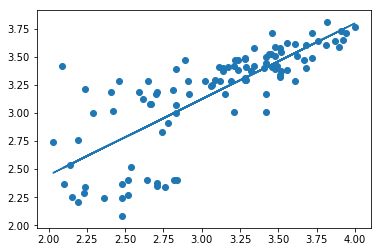

In [2]:
"""
Data Mining_Assignment 3

Name: Kaiqin Huang
Date Due: Feb 16, 2017

    Consider the attached csv file, which lists high school and college GPAs 
    for 105 students.
    
    Write a python module that computes a linear regression model to learn 
    the relationship between high school and university GPA.  
    In addition to learning the parameters for the best fit line, 
    plot the data points and line using PyPlot (library comes with anaconda).  
    You must write your own code to compute the regression parameters 
    and may not use a built-in library function.
    
    Submit a word doc with your plot and python code in a single file.
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

    
def corr(list1, list2):
    """Calculate the correlation of two lists
    
    Args:
        list1 and list2: list of floats
        
    Return:
        cr: correlation
    """
    
    len_list = len(list1)
    
    if len(list2) != len_list:
        print("Two lists have different lengths.")
    
    else:
        aver_x = aver(list1)
        aver_y = aver(list2)
        sum_xy = 0
        sum_xx = 0
        sum_yy = 0
        for i in range(len_list):
            dev_x = list1[i] - aver_x
            dev_y = list2[i] - aver_y
            sum_xy += dev_x * dev_y
            sum_xx += dev_x * dev_x
            sum_yy += dev_y * dev_y           
        cr = sum_xy / math.sqrt(sum_xx * sum_yy)    
        return cr


def aver(list_input):
    """Calculate the mean of numbers in a list
    
    Args:
        list: a list of floats
        
    Return:
        aver_list: mean
    """
 
    len_list = len(list_input)
    
    sum_list = 0
    for i in range(len_list):
        sum_list += list_input[i]
        
    aver_list = sum_list / len_list
    
    return aver_list


def sd(list_input):
    """Calculate the standard deviation of numbers in a list
    
    Args:
        list: a list of floats
        
    Return:
        sd_list: standard deviation
    """
 
    aver_list = aver(list_input)
    len_list = len(list_input)
    
    sum_dev = 0
    for i in range(len_list):
        sum_dev += (list_input[i] - aver_list) * (list_input[i] - aver_list)
        
    sd_list = math.sqrt(sum_dev / (len_list - 1))
    
    return sd_list


def test_corr():
    assert corr([1,2,3], [1,2,3]) == 1 


def test_aver():
    assert aver([1,2,3]) == 1
 
              
def test_sd():
    assert sd([1,2,3]) == 1
             



df = pd.read_csv("GPA_Reg.csv", header = 0, nrows = 105)

high_GPA = df["high_GPA"]
univ_GPA = df["univ_GPA"]

m_est = corr(high_GPA, univ_GPA) * sd(univ_GPA) / sd(high_GPA)
b_est = aver(univ_GPA) - m_est * aver(high_GPA)
print("The estimated values of m and b are:")
print(m_est, b_est)
print("Using built-in regression function in Numpy, the estimated m and b are:")
print(np.polyfit(high_GPA, univ_GPA, 1))
   
univ_GPA_est = []
for i in range(len(high_GPA)):
    univ_GPA_predict = m_est * high_GPA[i] + b_est
    univ_GPA_est.append(univ_GPA_predict)
    
plt.scatter(high_GPA, univ_GPA)   
plt.plot(high_GPA, univ_GPA_est)
plt.show()
plt.savefig("Assignment3_GPA_regression.png")
